In [1]:
from torch.utils.data import Dataset
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torch
import cv2
import argparse
import tensorflow as tf

In [2]:
train = np.load('data/fer2013_train.npz')
val = np.load('data/fer2013_test.npz')

In [3]:
x_train, y_train = train['X'], train['Y']
X_train_reshaped = x_train.reshape(-1, 48, 48, 1)
x_val, y_val = val['X'], val['Y']
X_val_reshaped = x_val.reshape(-1, 48, 48, 1)

In [4]:
X_train_rgb = []
X_val_rgb = []

In [51]:
X_train_rgb = np.array(X_train_rgb)
X_val_rgb = np.array(X_val_rgb)

In [5]:
for image in X_train_reshaped:
    image = cv2.cvtColor(np.float32(image), cv2.COLOR_GRAY2RGB)
    X_train_rgb.append(image)
for image in X_val_reshaped:
    image = cv2.cvtColor(np.float32(image), cv2.COLOR_GRAY2RGB)
    X_val_rgb.append(image)   

In [6]:
data_train = tf.data.Dataset.from_tensor_slices((X_train_rgb, y_train))
data_test = tf.data.Dataset.from_tensor_slices((X_val_rgb, y_val))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Tạo một ImageDataGenerator cho data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [121]:
print(X_train_reshaped.shape)
print(len(X_train_rgb))

(15254, 48, 48, 1)
15254


In [118]:
print(type(X_train_rgb))
print(type(X_train_reshaped))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
data_train = data_train.map(lambda x,y: (x/255, y))
data_test = data_test.map(lambda x,y: (x/255, y))

In [52]:
batch_size = 32
train_generator = datagen.flow(X_train_rgb, y_train, batch_size=batch_size)

In [122]:
X = []
X.append(X_train_rgb[0])

In [123]:
X = np.array(X)
y = y_train[0]
train_x = datagen.flow(X, y, 1)

In [131]:
print(X_train_rgb[0])

[[[ 24.  24.  24.]
  [ 32.  32.  32.]
  [ 36.  36.  36.]
  ...
  [173. 173. 173.]
  [172. 172. 172.]
  [173. 173. 173.]]

 [[ 25.  25.  25.]
  [ 34.  34.  34.]
  [ 29.  29.  29.]
  ...
  [173. 173. 173.]
  [172. 172. 172.]
  [173. 173. 173.]]

 [[ 26.  26.  26.]
  [ 29.  29.  29.]
  [ 25.  25.  25.]
  ...
  [172. 172. 172.]
  [172. 172. 172.]
  [174. 174. 174.]]

 ...

 [[159. 159. 159.]
  [185. 185. 185.]
  [157. 157. 157.]
  ...
  [157. 157. 157.]
  [156. 156. 156.]
  [153. 153. 153.]]

 [[136. 136. 136.]
  [157. 157. 157.]
  [187. 187. 187.]
  ...
  [152. 152. 152.]
  [152. 152. 152.]
  [150. 150. 150.]]

 [[145. 145. 145.]
  [130. 130. 130.]
  [161. 161. 161.]
  ...
  [142. 142. 142.]
  [143. 143. 143.]
  [142. 142. 142.]]]


In [130]:
for batch_x, batch_y in train_x:
    # Hiển thị ảnh đầu tiên trong batch
    #plt.imshow(batch_x[0].astype(np.uint8))
    print(batch_x[0].astype(np.uint8))
    break  # Chỉ hiển thị ảnh đầu tiên trong batch đầu tiên

[[[ 29  29  29]
  [ 30  30  30]
  [ 32  32  32]
  ...
  [173 173 173]
  [173 173 173]
  [173 173 173]]

 [[ 28  28  28]
  [ 27  27  27]
  [ 32  32  32]
  ...
  [173 173 173]
  [173 173 173]
  [173 173 173]]

 [[ 31  31  31]
  [ 32  32  32]
  [ 31  31  31]
  ...
  [173 173 173]
  [173 173 173]
  [173 173 173]]

 ...

 [[108 108 108]
  [112 112 112]
  [125 125 125]
  ...
  [152 152 152]
  [152 152 152]
  [152 152 152]]

 [[129 129 129]
  [102 102 102]
  [119 119 119]
  ...
  [152 152 152]
  [152 152 152]
  [152 152 152]]

 [[164 164 164]
  [118 118 118]
  [108 108 108]
  ...
  [151 151 151]
  [151 151 151]
  [151 151 151]]]


In [56]:
import matplotlib.pyplot as plt

In [13]:
batch_size = 32
data_train = data_train.batch(32)
data_test = data_test.batch(32)

In [14]:
data_iterator = data_test.as_numpy_iterator()

In [20]:
batch = data_iterator.next()
print(batch[0].shape)

(32, 48, 48, 3)


In [107]:
print((image))

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


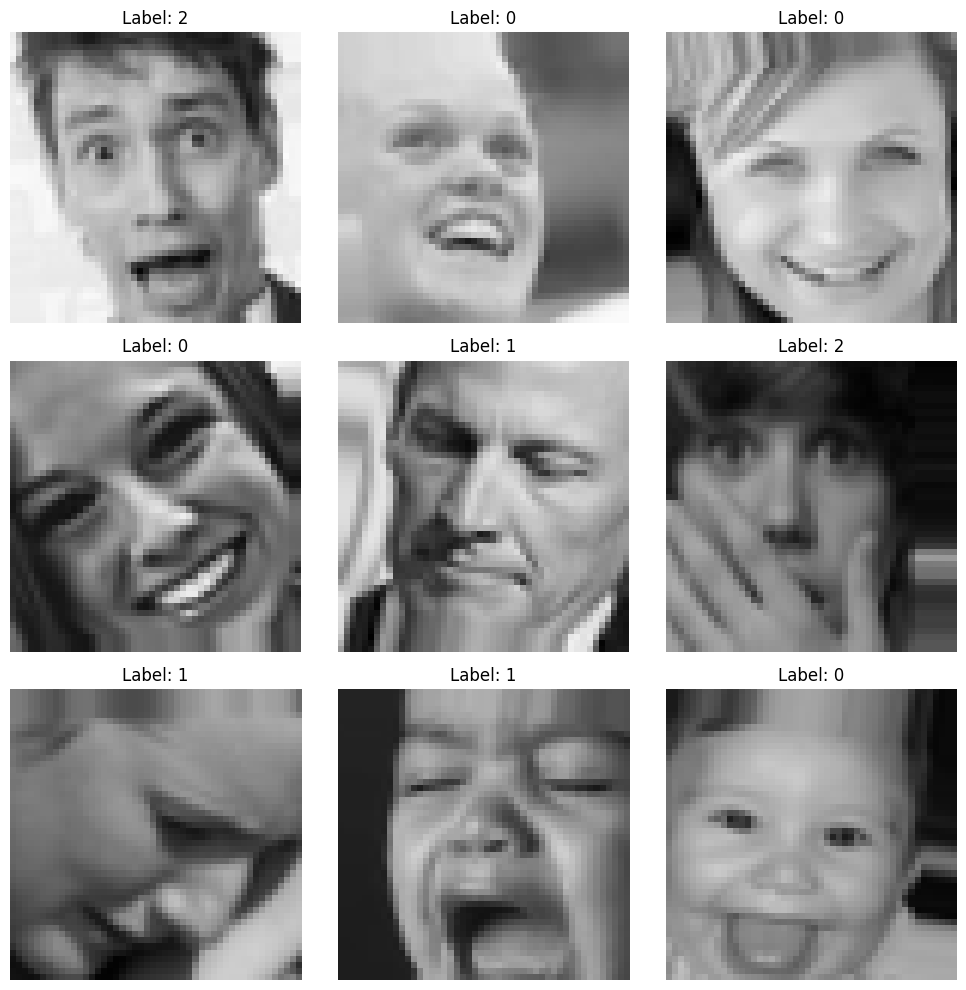

In [110]:
for batch_x, batch_y in train_generator:
    # Hiển thị ảnh đầu tiên trong batch
    # plt.imshow(batch_x[0].astype(np.uint8))
    print(batch_x[0].astype(np.uint8))
    break  # Chỉ hiển thị ảnh đầu tiên trong batch đầu tiên

In [9]:
print(batch)

(array([[[[0.97254902],
         [0.97254902],
         [0.97647059],
         ...,
         [0.98431373],
         [0.98431373],
         [0.98823529]],

        [[0.96470588],
         [0.97254902],
         [0.97254902],
         ...,
         [0.98823529],
         [0.98823529],
         [0.98823529]],

        [[0.96078431],
         [0.96470588],
         [0.96470588],
         ...,
         [0.98039216],
         [0.98431373],
         [0.98431373]],

        ...,

        [[0.85098039],
         [0.8627451 ],
         [0.86666667],
         ...,
         [0.88235294],
         [0.88235294],
         [0.88235294]],

        [[0.85490196],
         [0.85882353],
         [0.87058824],
         ...,
         [0.89019608],
         [0.88235294],
         [0.88235294]],

        [[0.85490196],
         [0.86666667],
         [0.8745098 ],
         ...,
         [0.89019608],
         [0.88627451],
         [0.88627451]]],


       [[[0.97254902],
         [0.97647059],
         [0.9

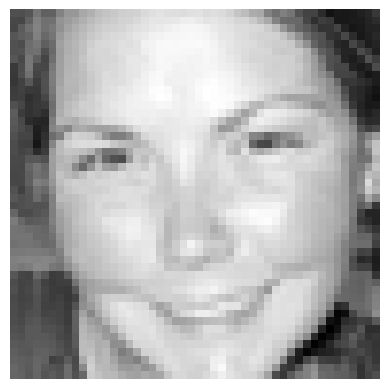

In [115]:
import matplotlib.pyplot as plt

# Ảnh đầu tiên trong X_train
image = X_train_reshaped[3]

# Reshape ảnh về định dạng 48x48
image_reshape = image.reshape((48, 48))

# Hiển thị ảnh
plt.imshow(image, cmap='gray')
plt.axis('off')  # Tắt các trục
plt.show()


In [15]:
print(y_train)

[1 1 0 ... 2 1 2]


In [16]:
print(train)

##  Build Tensorflow model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.7))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.7))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.7))


model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Số lượng lớp output là 3 và sử dụng softmax cho bài toán phân loại

In [45]:
model.compile('Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_8 (Bat  (None, 46, 46, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 batch_normalization_9 (Bat  (None, 44, 44, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                      

# Train model

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [48]:
# Train the model
history = model.fit(train_generator , epochs=50, validation_data=data_test, callbacks=[tensorboard_callback])

Epoch 1/50
 14/477 [..............................] - ETA: 1:19 - loss: 1.7303 - accuracy: 0.3527

KeyboardInterrupt: 